# Preprocess SWB Behavior 

Created: 10/06/2024 \
Updated: 11/19/2024 \


In [1]:
import numpy as np
import matplotlib.pyplot as plt #if matplotlib error - uninstall all matplotlib and pillow versions and conda install pillow==9.4.0
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from scipy.stats import zscore, linregress, ttest_ind, ttest_rel, ttest_1samp
import pandas as pd
import os
import statsmodels.api as sm
import datetime
import glob
import sys

import warnings
warnings.filterwarnings('ignore')


In [2]:
base_dir  = '/Users/alexandrafink/Documents/GraduateSchool/SaezLab/SWB/'
behav_dir = f'{base_dir}behavior_analysis/'
raw_dir   = f'{behav_dir}behavior_raw/'
paper_dir = f'{base_dir}manuscript/'
save_dir  = f'{paper_dir}data/behav/single_subj/'
os.makedirs(save_dir,exist_ok=True)

date = datetime.date.today().strftime('%m%d%Y')
print(date)

11202024


In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

sys.path.append(f'{paper_dir}scripts/behav/')

from behav_utils import *
from swb_subj_behav import * 

# Preprocess raw behav
- load raw behav txt file
- create subj data class obj
- preprocess and save task and mood dfs

In [4]:
subj_ids = list(pd.read_excel(f'{base_dir}SWB_subjects.xlsx', 
                              sheet_name='Usable_Subjects', usecols=[0]).PatientID)



# Make all behav dfs 

In [5]:
# load and save preprocessed dfs
raw_behav = []
raw_mood  = []

for subj_id in subj_ids:
    subj_data = swb_subj_behav(subj_id,raw_dir,'all',save_dir)
    task_df, mood_df = subj_data.preprocess_behav()
    raw_behav.append(task_df)
    raw_mood.append(mood_df)

# load preprocessed data 
# raw_behav= [pd.read_csv(f'{save_dir}{subj_id}_task_df.csv') for subj_id in subj_ids]
# raw_mood = [pd.read_csv(f'{save_dir}{subj_id}_mood_df.csv') for subj_id in subj_ids]


In [6]:
all_behav,drops = format_all_behav(raw_behav,return_drops=True,drop_bads=False,drop_bads_t1=False)


In [7]:
all_behav

,subj_id,bdi,bdi_thresh,Round,TrialNum,RT,TrialOnset,ChoiceOnset,DecisionOnset,FeedbackOnset,...,HighBet_t1_raw,Profit_t1_raw,TotalProfit_t1_raw,GambleEV_t1_raw,TrialEV_t1_raw,CR_t1_raw,choiceEV_t1_raw,rpe_t1_raw,cf_t1_raw,cpe_t1_raw
0,MS002,14,low,1,25.0,2.059852,513.380590,513.390239,515.450091,515.457173,...,0.00,-0.95,9.05,-0.475,-0.416667,NaN,-0.475,-0.475,-0.30,-0.65
1,MS002,14,low,2,117.0,1.954564,522.640856,522.641563,524.596127,526.627092,...,1.68,1.68,10.73,0.840,0.693333,NaN,0.840,0.840,0.40,1.28
2,MS002,14,low,3,79.0,1.583462,531.174799,531.175599,532.759061,534.780269,...,1.20,0.00,10.73,0.200,0.133333,0.0,NaN,0.000,-0.80,0.80
3,MS002,14,low,4,42.0,2.491611,545.592613,545.593355,548.084966,548.092333,...,1.24,1.24,11.97,0.620,0.580000,NaN,0.620,0.620,0.50,0.74
4,MS002,14,low,5,85.0,1.768936,555.337336,555.345720,557.114656,559.135069,...,0.73,0.00,11.97,-0.185,-0.123333,0.0,NaN,0.000,-1.10,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,DA039,22,high,146,79.0,1.079701,2259.827656,2259.828749,2260.908450,2262.926195,...,0.60,0.00,18.95,-0.450,-0.300000,0.0,NaN,0.000,-1.50,1.50
4046,DA039,22,high,147,30.0,1.837272,2267.502359,2267.534059,2269.371331,2269.377701,...,0.41,0.00,18.95,-0.045,-0.030000,0.0,NaN,0.000,0.41,-0.41
4047,DA039,22,high,148,13.0,4.030006,2282.349445,2282.350662,2286.380667,2286.389886,...,0.42,0.00,18.95,-0.190,-0.126667,0.0,NaN,0.000,0.42,-0.42
4048,DA039,22,high,149,18.0,3.167144,2293.040983,2293.042042,2296.209186,2296.218136,...,0.00,-2.50,16.45,-1.250,-1.000000,NaN,-1.250,-1.250,-0.50,-2.00


In [ ]:
# temp_behav,beh_drops = format_all_behav(raw_behav,return_drops=True,norm=False)

# all_orthog_rpe  = []
# all_rpe_cpe_rsq = []
# behav_list = []

# for ix, subj_id in enumerate(subj_ids): 
# #     subj_df = raw_behav[ix]
#     subj_df = temp_behav[temp_behav.subj_id==subj_id].reset_index(drop=True)
#     # find indices where cpe is not nan
#     notnan_idx = [ix for ix,cpe in enumerate(subj_df.cpe) if not np.isnan(cpe)]
#     # initialize save vector
#     subj_df['orthog_rpe'] = np.nan
#     # run ols regression rpe ~ cpe
#     rpe_cpe = sm.OLS(subj_df.rpe,sm.add_constant(subj_df.cpe),missing='drop').fit()
#     all_rpe_cpe_rsq.append(rpe_cpe.rsquared)
#     subj_df['orthog_rpe'][notnan_idx] = rpe_cpe.resid
#     all_orthog_rpe.extend(subj_df['orthog_rpe'])
#     behav_list.append(subj_df)

# all_behav,beh_drops = format_all_behav(behav_list,return_drops=True,norm=True)
# # all_behav
# all_behav.to_csv(f'{save_dir}all_behav_{date}.csv')
# # del raw_behav, behav_list, temp_behav

In [40]:
# raw_behav= [pd.read_csv(f'{save_dir}{subj_id}_task_df.csv') for subj_id in subj_ids]
# all_behav = format_all_behav(raw_behav)
# all_behav,drops = format_all_behav(raw_behav,return_drops=True,drop_bads=True,drop_bads_t1=True)
# all_behav,drops = format_all_behav(raw_behav,return_drops=True,drop_bads=True)
# all_behav,beh_drops = format_all_behav(raw_behav,return_drops=True)
# all_behav

,subj_id,bdi,bdi_thresh,Round,TrialNum,RT,TrialOnset,ChoiceOnset,DecisionOnset,FeedbackOnset,...,GambleEV_t1,TrialEV_t1,CR_t1,choiceEV_t1,rpe_t1,res_type_t1,cf_t1,cpe_t1,keep_epoch,keep_epoch_t1
0,MS002,14,low,1,25.0,2.059852,513.380590,513.390239,515.450091,515.457173,...,-0.411450,-0.423529,NaN,-0.545852,-0.553325,gamble_bad,-0.150761,-0.450578,keep,keep
1,MS002,14,low,2,117.0,1.954564,522.640856,522.641563,524.596127,526.627092,...,0.772187,0.737993,NaN,0.495438,0.954543,gamble_good,0.277858,0.728779,keep,keep
2,MS002,14,low,3,79.0,1.583462,531.174799,531.175599,532.759061,534.780269,...,0.196120,0.152000,0.090121,NaN,-0.008658,safe_good,-0.456918,0.435467,keep,keep
3,MS002,14,low,4,42.0,2.491611,545.592613,545.593355,548.084966,548.092333,...,0.574164,0.619399,NaN,0.321229,0.702276,gamble_good,0.339089,0.398803,keep,keep
4,MS002,14,low,5,85.0,1.768936,555.337336,555.345720,557.114656,559.135069,...,-0.150420,-0.116581,0.090121,NaN,-0.008658,safe_good,-0.640612,0.618787,keep,keep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,DA039,22,high,146,79.0,1.079701,2259.827656,2259.828749,2260.908450,2262.926195,...,-0.385065,-0.297739,0.343221,NaN,0.007477,safe_good,-1.253105,0.916364,keep,keep
4046,DA039,22,high,147,30.0,1.837272,2267.502359,2267.534059,2269.371331,2269.377701,...,-0.018381,-0.014213,0.343221,NaN,0.007477,safe_bad,0.356530,-0.300100,keep,keep
4047,DA039,22,high,148,13.0,4.030006,2282.349445,2282.350662,2286.380667,2286.389886,...,-0.149663,-0.115722,0.343221,NaN,0.007477,safe_bad,0.364957,-0.306469,keep,keep
4048,DA039,22,high,149,18.0,3.167144,2293.040983,2293.042042,2296.209186,2296.218136,...,-1.109379,-1.032806,NaN,-1.312281,-1.093440,gamble_bad,-0.410364,-1.312759,keep,keep


In [8]:
# all_mood, mood_drops = format_all_mood(raw_mood, all_behav, return_drops=True,drop_bads=True)
all_mood, mood_drops = format_all_mood(raw_mood, all_behav, return_drops=True)
all_mood

,subj_id,bdi,bdi_thresh,Round,Rating,RatingOnset,RT,Round_t1_idx,Round_t2_idx,Round_t3_idx,...,rpe_t3,cf_t1,cf_t2,cf_t3,cpe_t1,cpe_t2,cpe_t3,mood_epoch_len,next_round_start,norm_mood
0,MS002,14,low,4,70.0,539.343131,5.210698,3,2,1,...,-0.017374,0.551367,-0.307083,0.759848,1.461373,-0.892581,-0.795008,5.310698,545.592613,0.277664
1,MS002,14,low,7,70.0,572.673634,3.332630,6,5,4,...,-0.017374,-1.288170,0.674003,-0.920262,1.241834,0.802754,0.875934,3.432630,577.049490,0.277664
2,MS002,14,low,10,69.0,605.109393,3.499831,9,8,7,...,-1.720166,0.060824,-0.307083,-0.674991,-1.441430,0.266101,-1.185300,3.599831,609.642231,0.134538
3,MS002,14,low,13,71.0,638.791836,3.884104,12,11,10,...,-1.103047,1.164546,0.306096,0.428731,-1.197497,0.680788,-0.465698,3.984104,643.713750,0.420789
4,MS002,14,low,16,71.0,671.977904,4.250371,15,14,13,...,-0.017374,0.060824,0.796639,0.060824,1.729700,-0.831598,-0.831598,4.350371,677.264040,0.420789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,DA039,22,high,139,45.0,2176.828649,2.673696,138,137,136,...,-0.887088,NaN,-0.479399,0.915739,NaN,0.314126,-0.772921,2.773696,2180.513505,-0.524890
1346,DA039,22,high,142,45.0,2211.211948,2.961470,141,140,139,...,0.046736,0.760724,-3.362685,-0.014353,-0.652138,1.835992,-0.289789,3.061470,2215.197736,-0.524890
1347,DA039,22,high,145,55.0,2246.799223,3.347751,144,143,142,...,NaN,-1.967547,0.760724,NaN,1.111294,1.884306,NaN,3.447751,2251.180979,0.330135
1348,DA039,22,high,148,68.0,2276.912826,4.403968,147,146,145,...,-1.152672,-2.339584,0.605708,0.760724,1.763523,1.497800,-0.652138,4.503968,2282.349445,1.441667


In [9]:
all_mood.columns

Index(['subj_id', 'bdi', 'bdi_thresh', 'Round', 'Rating', 'RatingOnset', 'RT',
       'Round_t1_idx', 'Round_t2_idx', 'Round_t3_idx', 'epoch', 'epoch_t1_idx',
       'epoch_t2_idx', 'epoch_t3_idx', 'keep_mood', 'logRT', 'MoodChoiceOnset',
       'SafeBet_t1', 'SafeBet_t2', 'SafeBet_t3', 'LowBet_t1', 'LowBet_t2',
       'LowBet_t3', 'HighBet_t1', 'HighBet_t2', 'HighBet_t3', 'Profit_t1',
       'Profit_t2', 'Profit_t3', 'TotalProfit_t1', 'TotalProfit_t2',
       'TotalProfit_t3', 'GambleEV_t1', 'GambleEV_t2', 'GambleEV_t3',
       'TrialEV_t1', 'TrialEV_t2', 'TrialEV_t3', 'CR_t1', 'CR_t2', 'CR_t3',
       'choiceEV_t1', 'choiceEV_t2', 'choiceEV_t3', 'rpe_t1', 'rpe_t2',
       'rpe_t3', 'cf_t1', 'cf_t2', 'cf_t3', 'cpe_t1', 'cpe_t2', 'cpe_t3',
       'mood_epoch_len', 'next_round_start', 'norm_mood'],
      dtype='object')

# Examine Task Data 

In [87]:
all_orthog_rpe  = []
all_rpe_cpe_rsq = []

for subj_id in subj_ids: 
    subj_df = all_behav[all_behav.subj_id==subj_id].reset_index(drop=True)
    # find indices where cpe is not nan
    notnan_idx = [ix for ix,cpe in enumerate(subj_df.cpe) if not np.isnan(cpe)]
    # initialize save vector
    subj_df['orthog_rpe'] = np.nan
    # run ols regression rpe ~ cpe
    rpe_cpe = sm.OLS(subj_df.rpe,sm.add_constant(subj_df.cpe),missing='drop').fit()
    all_rpe_cpe_rsq.append(rpe_cpe.rsquared)
    subj_df['orthog_rpe'][notnan_idx] = rpe_cpe.resid
    all_orthog_rpe.extend(subj_df['orthog_rpe'])
    # del rpe_cpe 

all_behav['orthog_rpe'] = all_orthog_rpe
# https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process
# https://www.statsmodels.org/stable/examples/notebooks/generated/regression_plots.html


In [89]:
list(zip(subj_ids,all_rpe_cpe_rsq))

[('MS002', 0.23849070995885535),
 ('MS003', 0.6606735305028864),
 ('MS009', 0.34662487894193506),
 ('MS011', 0.39288336705844706),
 ('MS015', 0.7426130524786545),
 ('MS016', 0.5071276348287024),
 ('MS017', 0.48688307808323905),
 ('MS019', 0.8106399536623072),
 ('MS022', 0.6754653720641344),
 ('MS024', 0.17006419018601937),
 ('MS025', 0.09446085067863874),
 ('MS026', 0.36145440618968794),
 ('MS027', 0.4448765210722009),
 ('MS028', 0.594561289006134),
 ('MS029', 0.5610513335216508),
 ('MS030', 0.5893563751650654),
 ('MS033', 0.6679236114078353),
 ('MS035', 0.5245659206829315),
 ('MS041', 0.7485904896401807),
 ('MS043', 0.517605891219866),
 ('MS048', 0.42818659027617745),
 ('MS050', 0.5778696940507393),
 ('DA8', 0.24284377873095908),
 ('DA023', 0.36384872439298954),
 ('DA026', 0.2680380554162134),
 ('DA037', 0.662991343291149),
 ('DA039', 0.5513354277688376)]

In [91]:
all_behav

,subj_id,bdi,bdi_thresh,Round,TrialNum,RT,TrialOnset,ChoiceOnset,DecisionOnset,FeedbackOnset,...,TrialEV_t1,CR_t1,choiceEV_t1,rpe_t1,res_type_t1,cf_t1,cpe_t1,keep_epoch,keep_epoch_t1,orthog_rpe
0,MS002,14,low,1,25.0,2.059852,513.380590,513.390239,515.450091,515.457173,...,-0.423529,NaN,-0.545852,-0.553325,gamble_bad,-0.150761,-0.450578,keep,keep,0.187054
1,MS002,14,low,2,117.0,1.954564,522.640856,522.641563,524.596127,526.627092,...,0.737993,NaN,0.495438,0.954543,gamble_good,0.277858,0.728779,keep,keep,-0.335455
2,MS002,14,low,3,79.0,1.583462,531.174799,531.175599,532.759061,534.780269,...,0.152000,0.090121,NaN,-0.008658,safe_good,-0.456918,0.435467,keep,keep,0.598891
3,MS002,14,low,4,42.0,2.491611,545.592613,545.593355,548.084966,548.092333,...,0.619399,NaN,0.321229,0.702276,gamble_good,0.339089,0.398803,keep,keep,-0.223641
4,MS002,14,low,5,85.0,1.768936,555.337336,555.345720,557.114656,559.135069,...,-0.116581,0.090121,NaN,-0.008658,safe_good,-0.640612,0.618787,keep,keep,0.507660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,DA039,22,high,146,79.0,1.079701,2259.827656,2259.828749,2260.908450,2262.926195,...,-0.297739,0.343221,NaN,0.007477,safe_good,-1.253105,0.916364,keep,keep,0.192101
4046,DA039,22,high,147,30.0,1.837272,2267.502359,2267.534059,2269.371331,2269.377701,...,-0.014213,0.343221,NaN,0.007477,safe_bad,0.356530,-0.300100,keep,keep,-0.651932
4047,DA039,22,high,148,13.0,4.030006,2282.349445,2282.350662,2286.380667,2286.389886,...,-0.115722,0.343221,NaN,0.007477,safe_bad,0.364957,-0.306469,keep,keep,0.231341
4048,DA039,22,high,149,18.0,3.167144,2293.040983,2293.042042,2296.209186,2296.218136,...,-1.032806,NaN,-1.312281,-1.093440,gamble_bad,-0.410364,-1.312759,keep,keep,0.235965


In [72]:
# CPE x RPE Correlation
rpe_cpe = sm.OLS(subj_df.rpe,sm.add_constant(subj_df.cpe),missing='drop').fit()
print(rpe_cpe.summary())




                            OLS Regression Results                            
Dep. Variable:                    rpe   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     163.4
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           6.59e-25
Time:                        01:04:12   Log-Likelihood:                -47.565
No. Observations:                 135   AIC:                             99.13
Df Residuals:                     133   BIC:                             104.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0165      0.030     -0.552      0.5

# Examine Mood DFs

mean:  68.06 var:  48.81639999999999 num drop RTs:  0


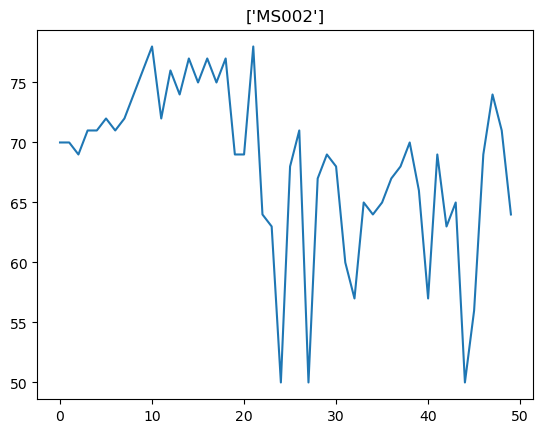

mean:  50.04 var:  4.398399999999999 num drop RTs:  1


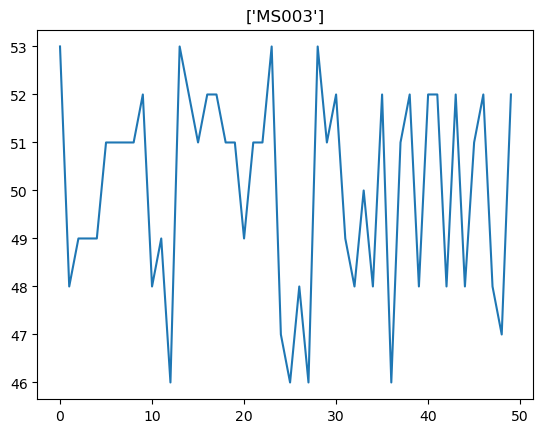

mean:  42.56 var:  28.966399999999986 num drop RTs:  0


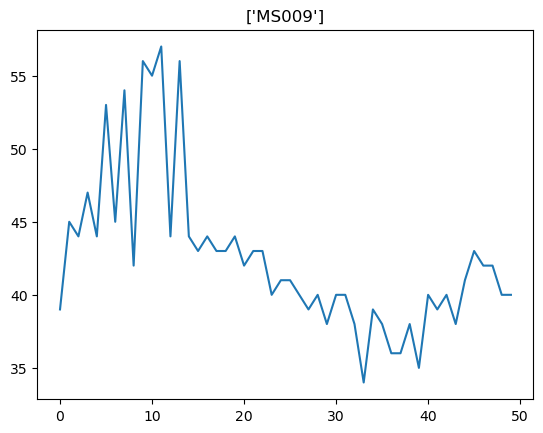

mean:  57.04 var:  68.23840000000001 num drop RTs:  0


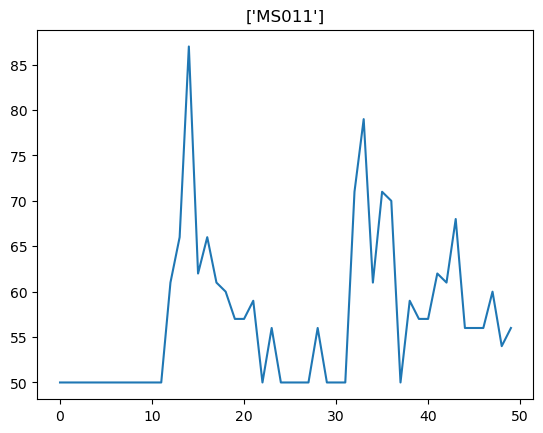

mean:  64.72 var:  70.40160000000002 num drop RTs:  5


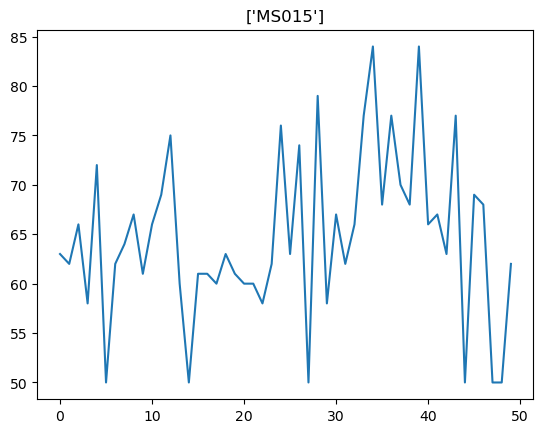

mean:  50.06 var:  2.896400000000004 num drop RTs:  0


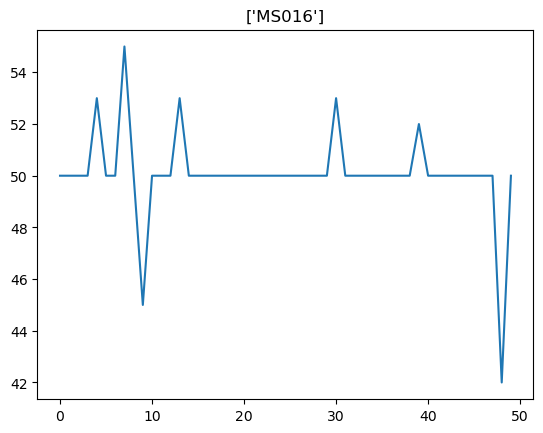

mean:  60.3 var:  280.09000000000003 num drop RTs:  0


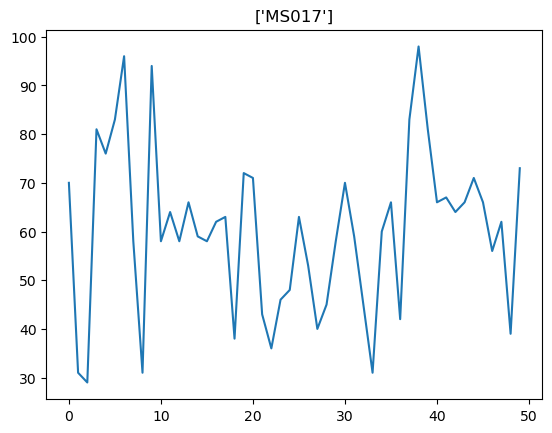

mean:  71.3 var:  175.48999999999995 num drop RTs:  9


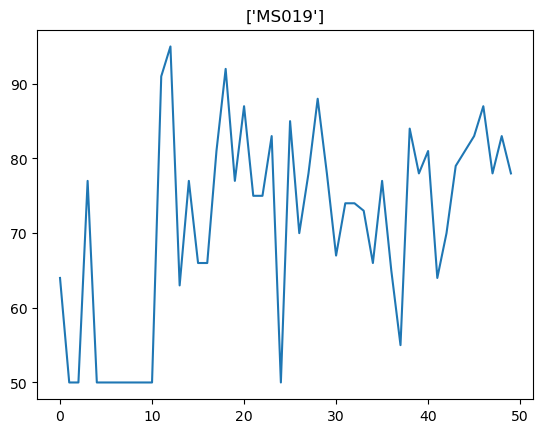

mean:  64.22 var:  60.89159999999997 num drop RTs:  0


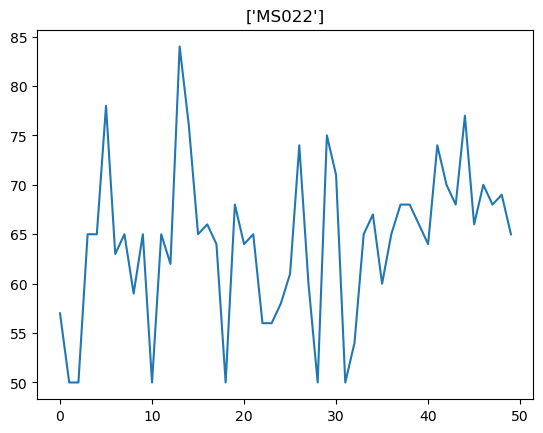

mean:  80.82 var:  10.907599999999997 num drop RTs:  0


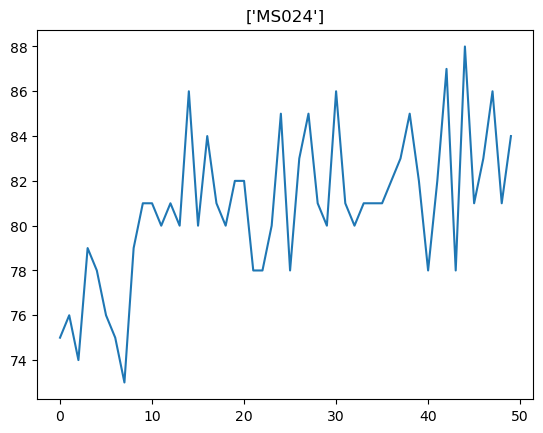

mean:  54.34 var:  332.2244 num drop RTs:  0


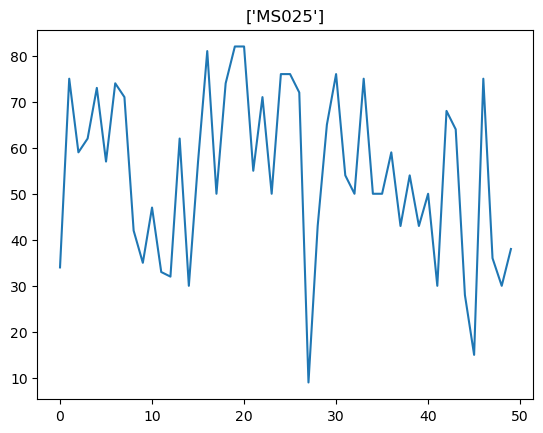

mean:  50.68 var:  60.9776 num drop RTs:  0


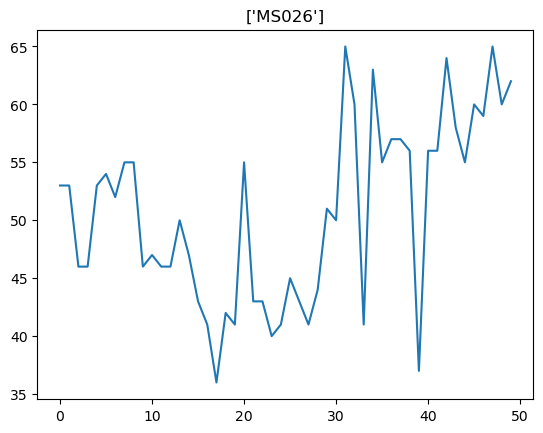

mean:  45.4 var:  16.639999999999997 num drop RTs:  0


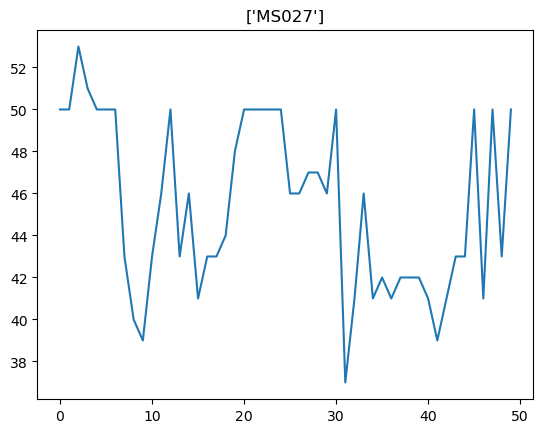

mean:  50.0 var:  0.0 num drop RTs:  0


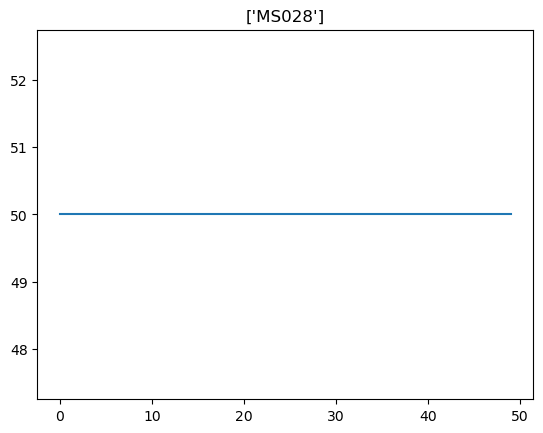

mean:  33.86 var:  424.12039999999985 num drop RTs:  0


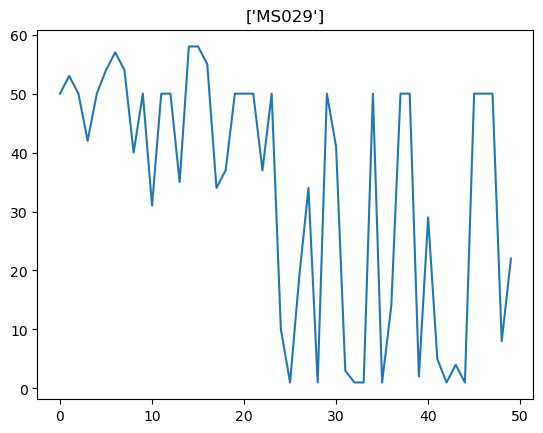

mean:  46.8 var:  0.1999999999999998 num drop RTs:  0


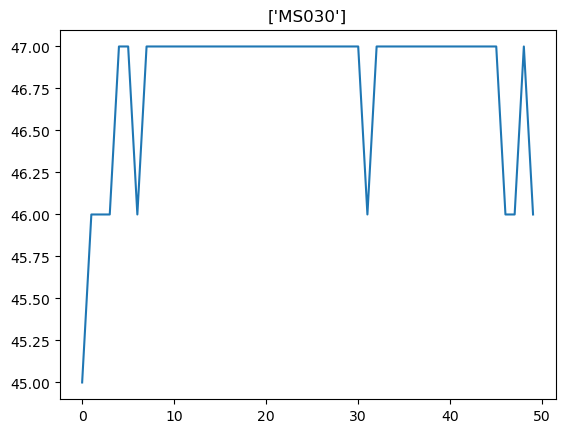

mean:  51.96 var:  17.1584 num drop RTs:  0


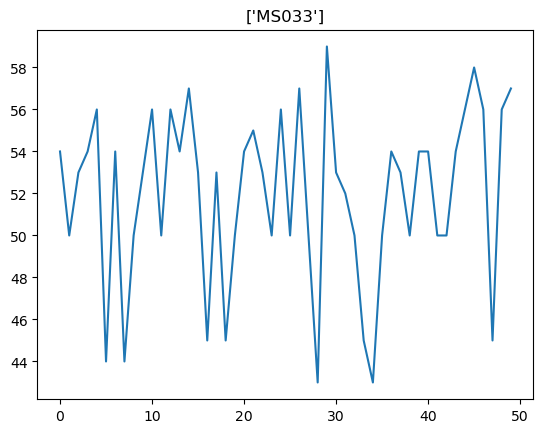

mean:  47.28 var:  323.52160000000003 num drop RTs:  0


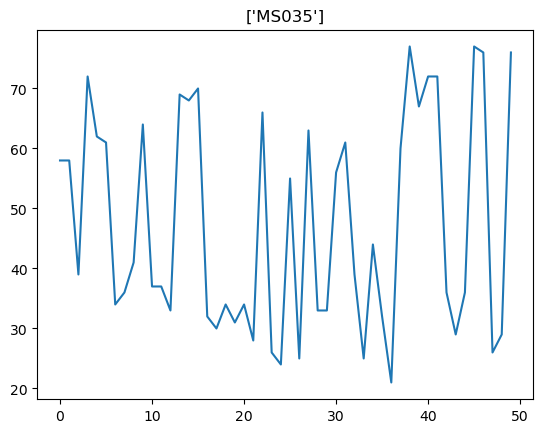

mean:  74.6 var:  25.800000000000004 num drop RTs:  0


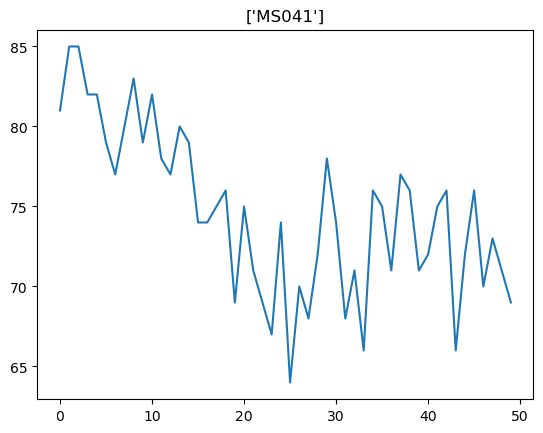

mean:  55.88 var:  134.3456 num drop RTs:  0


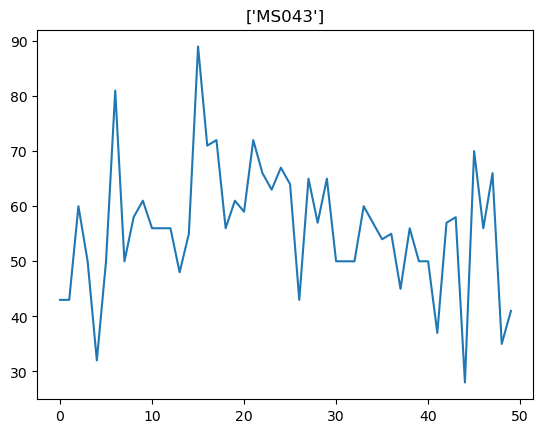

mean:  79.34 var:  124.3044 num drop RTs:  0


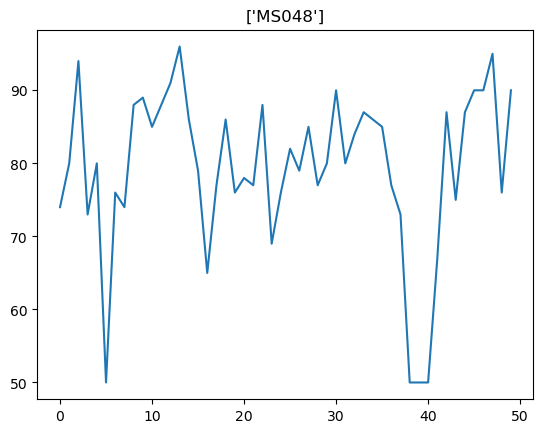

mean:  50.0 var:  0.0 num drop RTs:  0


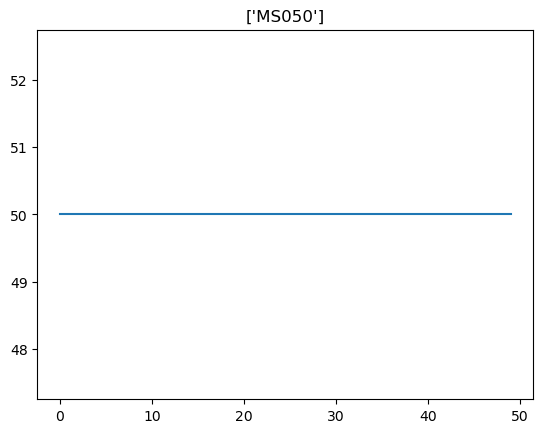

mean:  79.96 var:  23.638400000000004 num drop RTs:  0


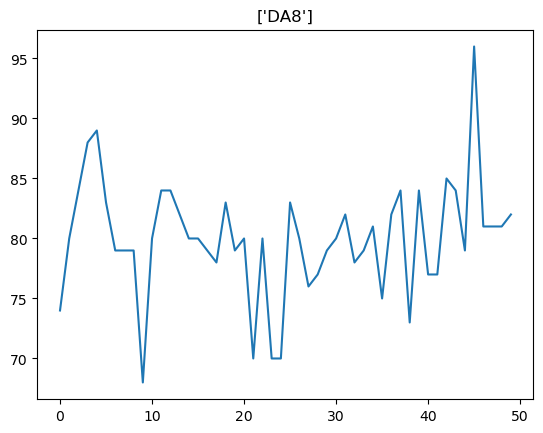

mean:  72.36 var:  170.95039999999997 num drop RTs:  8


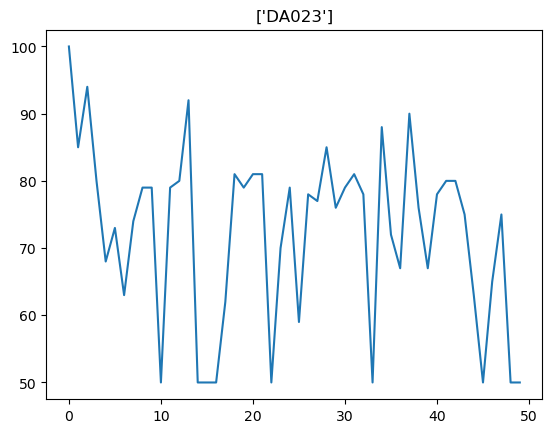

mean:  49.8 var:  12.120000000000005 num drop RTs:  0


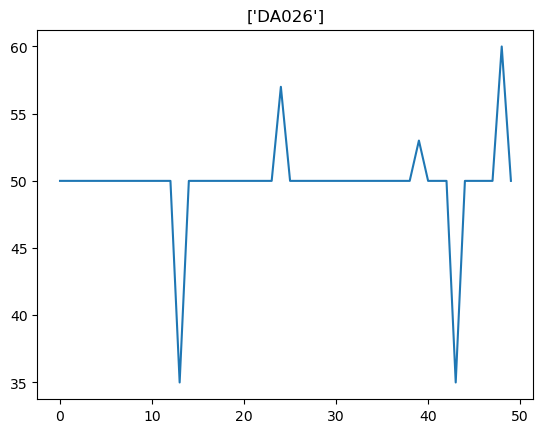

mean:  47.78 var:  208.1316 num drop RTs:  2


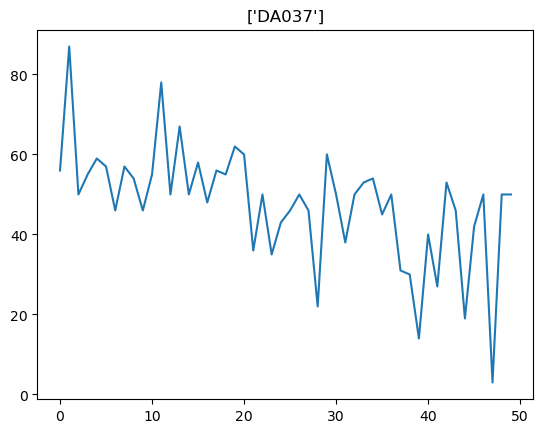

mean:  50.82 var:  98.7476 num drop RTs:  14


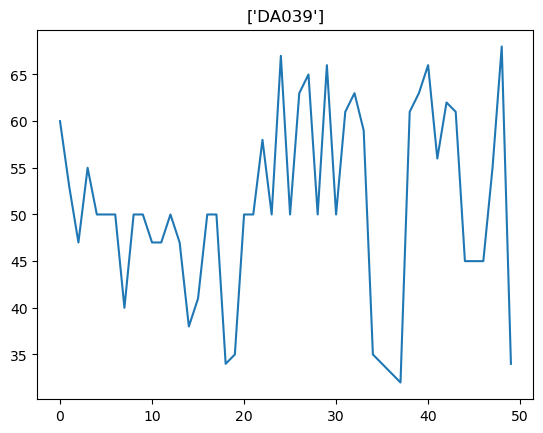

In [12]:
for df in raw_mood:
    plt.figure()
    print('mean: ',np.mean(df.Rating),'var: ',np.var(df.Rating),'num drop RTs: ',len(df[df.RT<0.3]))
    plt.plot(np.arange(0,len(df.Rating)),df.Rating)
    plt.title(df.subj_id.unique())
    plt.show()

In [13]:
for df in raw_mood:
    subj_id = df.subj_id.unique()
    drop_rts = df[df.RT<0.3].index
    print(subj_id,df.Rating[drop_rts])

['MS002'] Series([], Name: Rating, dtype: float64)
['MS003'] 33    50.0
Name: Rating, dtype: float64
['MS009'] Series([], Name: Rating, dtype: float64)
['MS011'] Series([], Name: Rating, dtype: float64)
['MS015'] 14    50.0
27    50.0
44    50.0
47    50.0
48    50.0
Name: Rating, dtype: float64
['MS016'] Series([], Name: Rating, dtype: float64)
['MS017'] Series([], Name: Rating, dtype: float64)
['MS019'] 1     50.0
2     50.0
4     50.0
5     50.0
6     50.0
7     50.0
8     50.0
9     50.0
24    50.0
Name: Rating, dtype: float64
['MS022'] Series([], Name: Rating, dtype: float64)
['MS024'] Series([], Name: Rating, dtype: float64)
['MS025'] Series([], Name: Rating, dtype: float64)
['MS026'] Series([], Name: Rating, dtype: float64)
['MS027'] Series([], Name: Rating, dtype: float64)
['MS028'] Series([], Name: Rating, dtype: float64)
['MS029'] Series([], Name: Rating, dtype: float64)
['MS030'] Series([], Name: Rating, dtype: float64)
['MS033'] Series([], Name: Rating, dtype: float64)
['MS

In [14]:
subj_id = 'DA039'
df = raw_mood[-1]
drop_rts = df[df.RT<0.3].index
drop_rts
df.Rating[drop_rts]

4     50.0
5     50.0
6     50.0
8     50.0
9     50.0
12    50.0
16    50.0
17    50.0
20    50.0
21    50.0
23    50.0
25    50.0
28    50.0
30    50.0
Name: Rating, dtype: float64

## check mood epoch timing 

In [74]:
task_controls = pd.read_csv('/sc/arion/projects/guLab/Alie/SWB/ephys_analysis/subj_info/swb_task_controls.csv')
# task_controls.head()
max_iti = np.max(task_controls.ITI)
max_iti

1.98

In [71]:
next_behav_rounds = []
next_round_starts = []
mood_round_starts = []

for df in mood_model_data:
    subj_id = df.subj_id.unique()[0]
    beh = all_behav[all_behav.subj_id==subj_id].reset_index()
    mood_round = df.Round
    mood_round_starts.append(df.RatingOnset[:-1])
    next_round = df.Round_t3_idx[1:]
    next_behav_rounds.append(next_round)
    next_round_starts.append([beh.loc[beh.Round.astype(int)==rnd,'TrialOnset'].values[0] for rnd in next_round])
    
#     next_round_starts.append(.TrialOnset)
#     beh.loc[beh.Round=='76', 'keep_epoch']
#     print(mood_round,next_behav_round)
    
#     Round_t1_idx
    
#     mood_rating_epochs

In [ ]:
max_iti

In [81]:
mood_rate_dur = []

for ix,df in enumerate(mood_model_data):
    subj_id = df.subj_id.unique()[0]
    mood_epochs = next_round_starts[ix]-mood_round_starts[ix]-max_iti
    mood_rate_dur.append(list(mood_epochs))

In [82]:
mood_rate_dur

[[4.269481100001503,
  2.3958561000013288,
  2.5528372999993008,
  2.9419135000003007,
  3.3061362000003283,
  3.1390319000015734,
  2.8773399000015343,
  3.2168966999993427,
  3.0296430000012333,
  3.0599294999988342,
  3.334444799998455,
  4.26832959999901,
  3.0633491999973512,
  2.9414509999982283,
  2.825618999998842,
  2.811424899998674,
  2.8356156000004558,
  4.494937899998394,
  3.2224114999985614,
  2.7094947000000684,
  2.338695199999638,
  3.478577299999888,
  1.7714033000004474,
  2.14279689999923,
  0.15793169999917156,
  2.204739599997556,
  2.3583424999994986,
  0.2466797000013412,
  2.509394500000344,
  4.059943700001458,
  2.3047311000004993,
  1.3685341999985394,
  0.8353278999996019,
  1.8124380000004021,
  1.6106670000003942,
  1.8470938999996815,
  2.1582698999987042,
  1.7868272000009893,
  2.4845281999983126,
  2.6483421000007366,
  1.340252899997513,
  2.4215013000023373,
  1.7586157000000822,
  2.230317699999223,
  0.6729217999998309,
  0.7994705000012527,
  2